<a href="https://colab.research.google.com/github/Jos21os/Suicide-Rate-US/blob/Python/Suicides_Rate_in_the_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries for this project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
data.head(10)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8
5,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,"13,840",33.2
6,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Colorado,"3,037",53.6
7,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Connecticut,"2,078",53.2
8,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Delaware,608,61.9
9,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,District of Columbia,427,61.0


Turning values into correct Types

In [ ]:
data.dtypes

Year                        int64
113 Cause Name             object
Cause Name                 object
State                      object
Deaths                     object
Age-adjusted Death Rate    object
dtype: object

Deleting unrelated data

In [ ]:
data.drop('113 Cause Name', inplace=True, axis=1)

In [ ]:
data = data.drop(data[data["Cause Name"] != "Suicide"].index)
data = data.drop(data[data["State"] == "United States"].index)
data = data.drop(data[data["Year"] > 2017].index)

In [ ]:
data.sort_values('Year', axis=0,ascending=False, inplace=True)
data.head(100)

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
417,2017,Suicide,Alabama,836,16.6
443,2017,Suicide,Montana,311,28.9
445,2017,Suicide,Nevada,627,20.3
446,2017,Suicide,New Hampshire,265,18.9
447,2017,Suicide,New Jersey,795,8.3
...,...,...,...,...,...
1006,2016,Suicide,Kentucky,756,16.8
1007,2016,Suicide,Louisiana,677,14.2
1008,2016,Suicide,Maine,226,15.9
1009,2016,Suicide,Maryland,586,9.4


In [ ]:
data.dtypes

Year                        int64
Cause Name                 object
State                      object
Deaths                     object
Age-adjusted Death Rate    object
dtype: object

<Figure size 2000x2000 with 0 Axes>

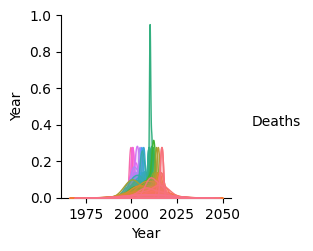

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.pairplot(data=data, hue='Deaths')
plt.show()

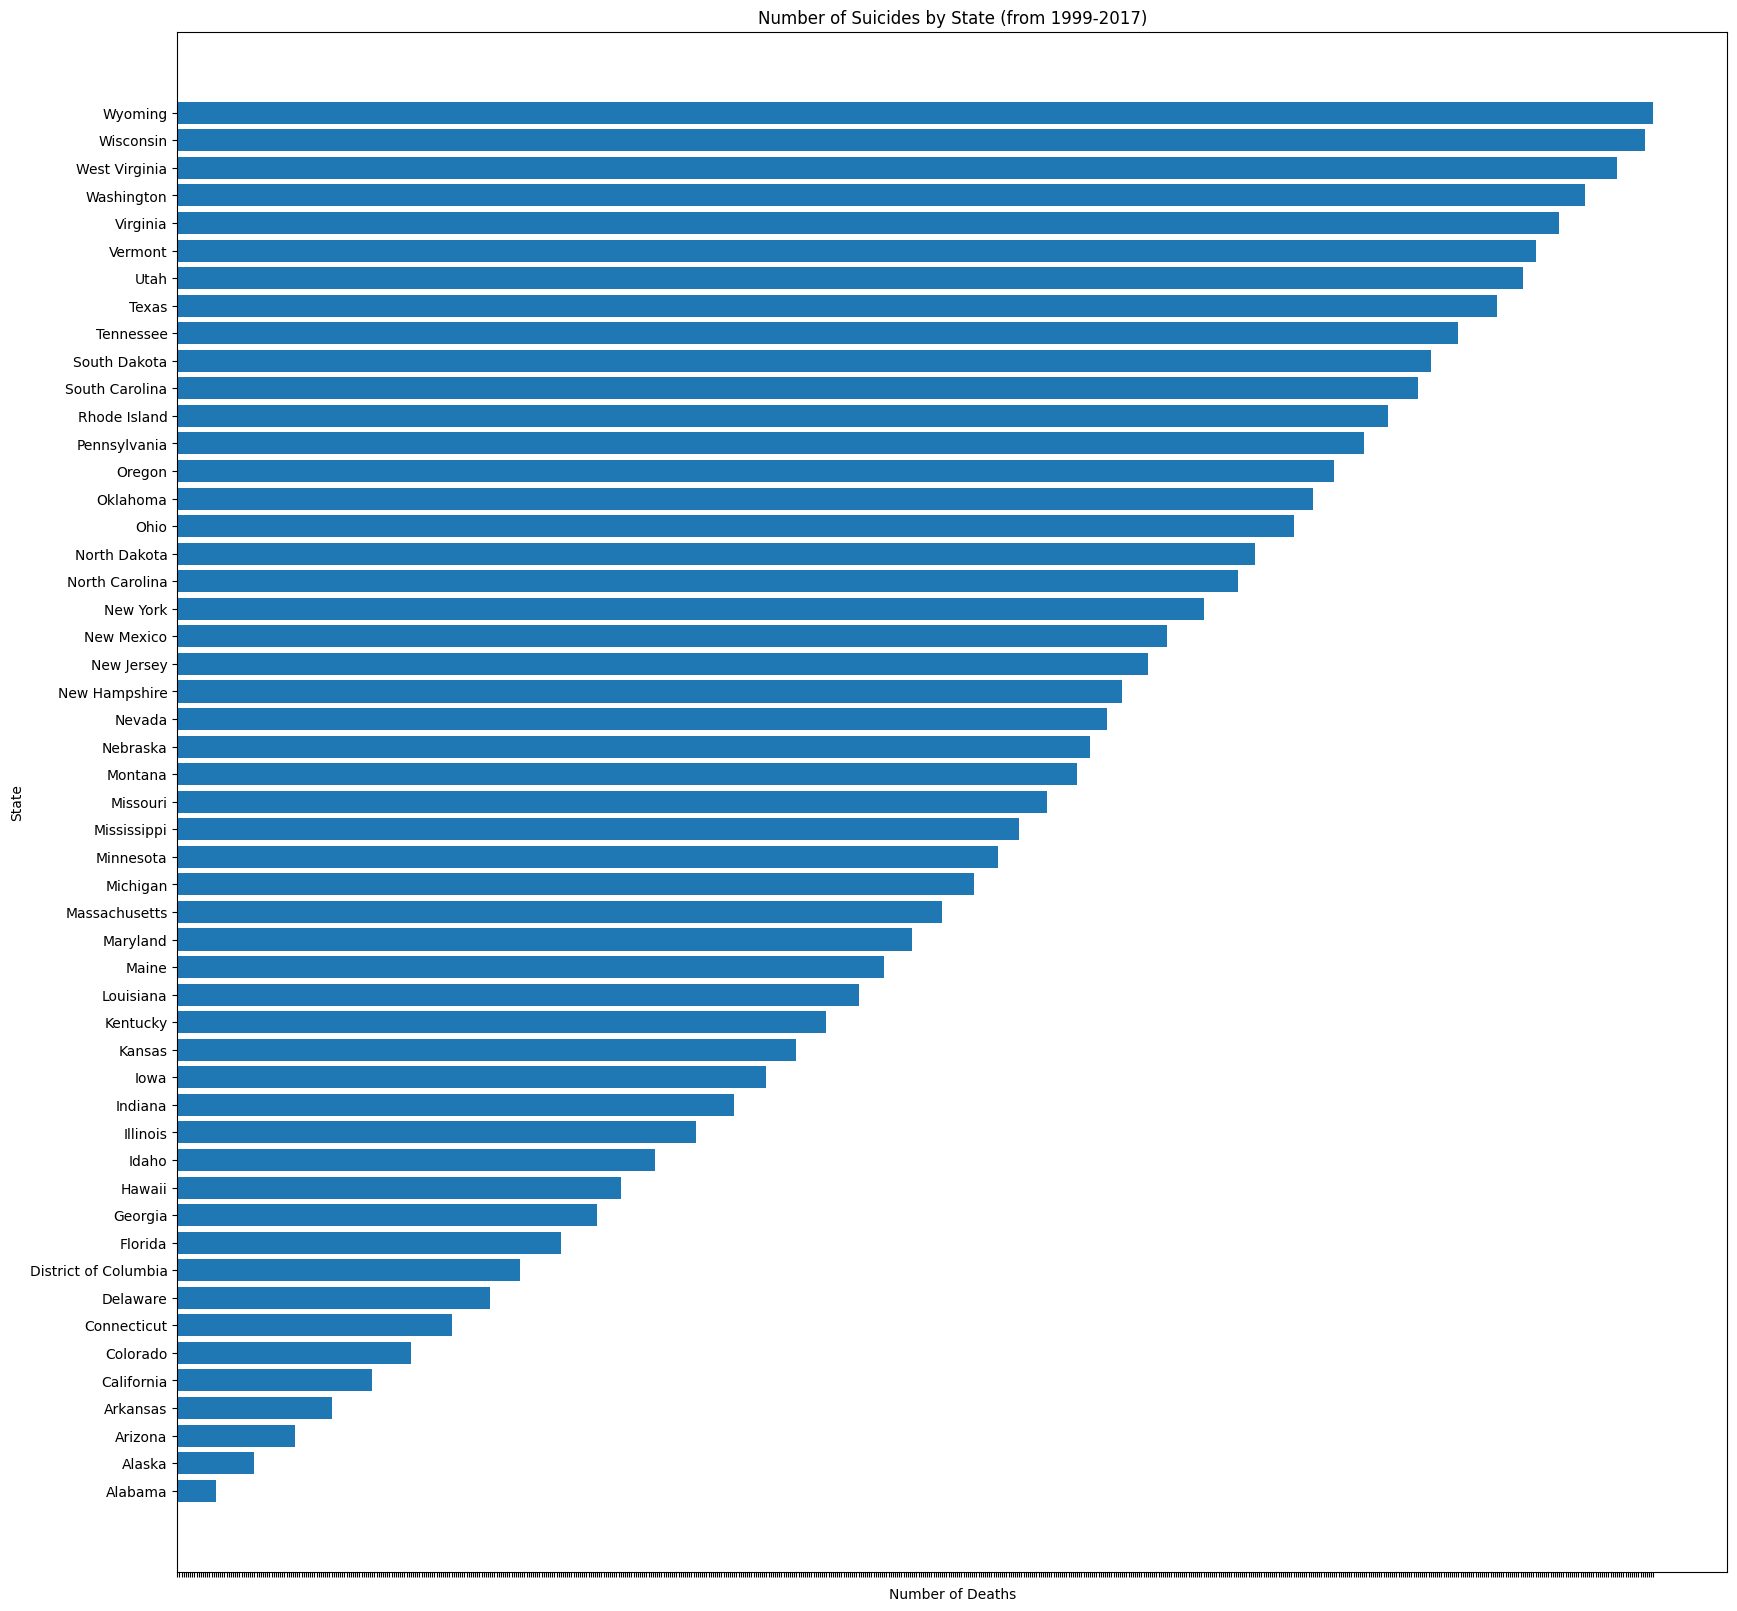

In [ ]:
# Assuming data is a pandas DataFrame
sorted_data = data.sort_values('State')

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(sorted_data['State'], sorted_data['Deaths'])
plt.xlabel("Number of Deaths")
plt.ylabel("State")
plt.title("Number of Suicides by State (from 1999-2017)")

# Set the xticklabels to an empty list
ax.set_xticklabels([])

plt.show()

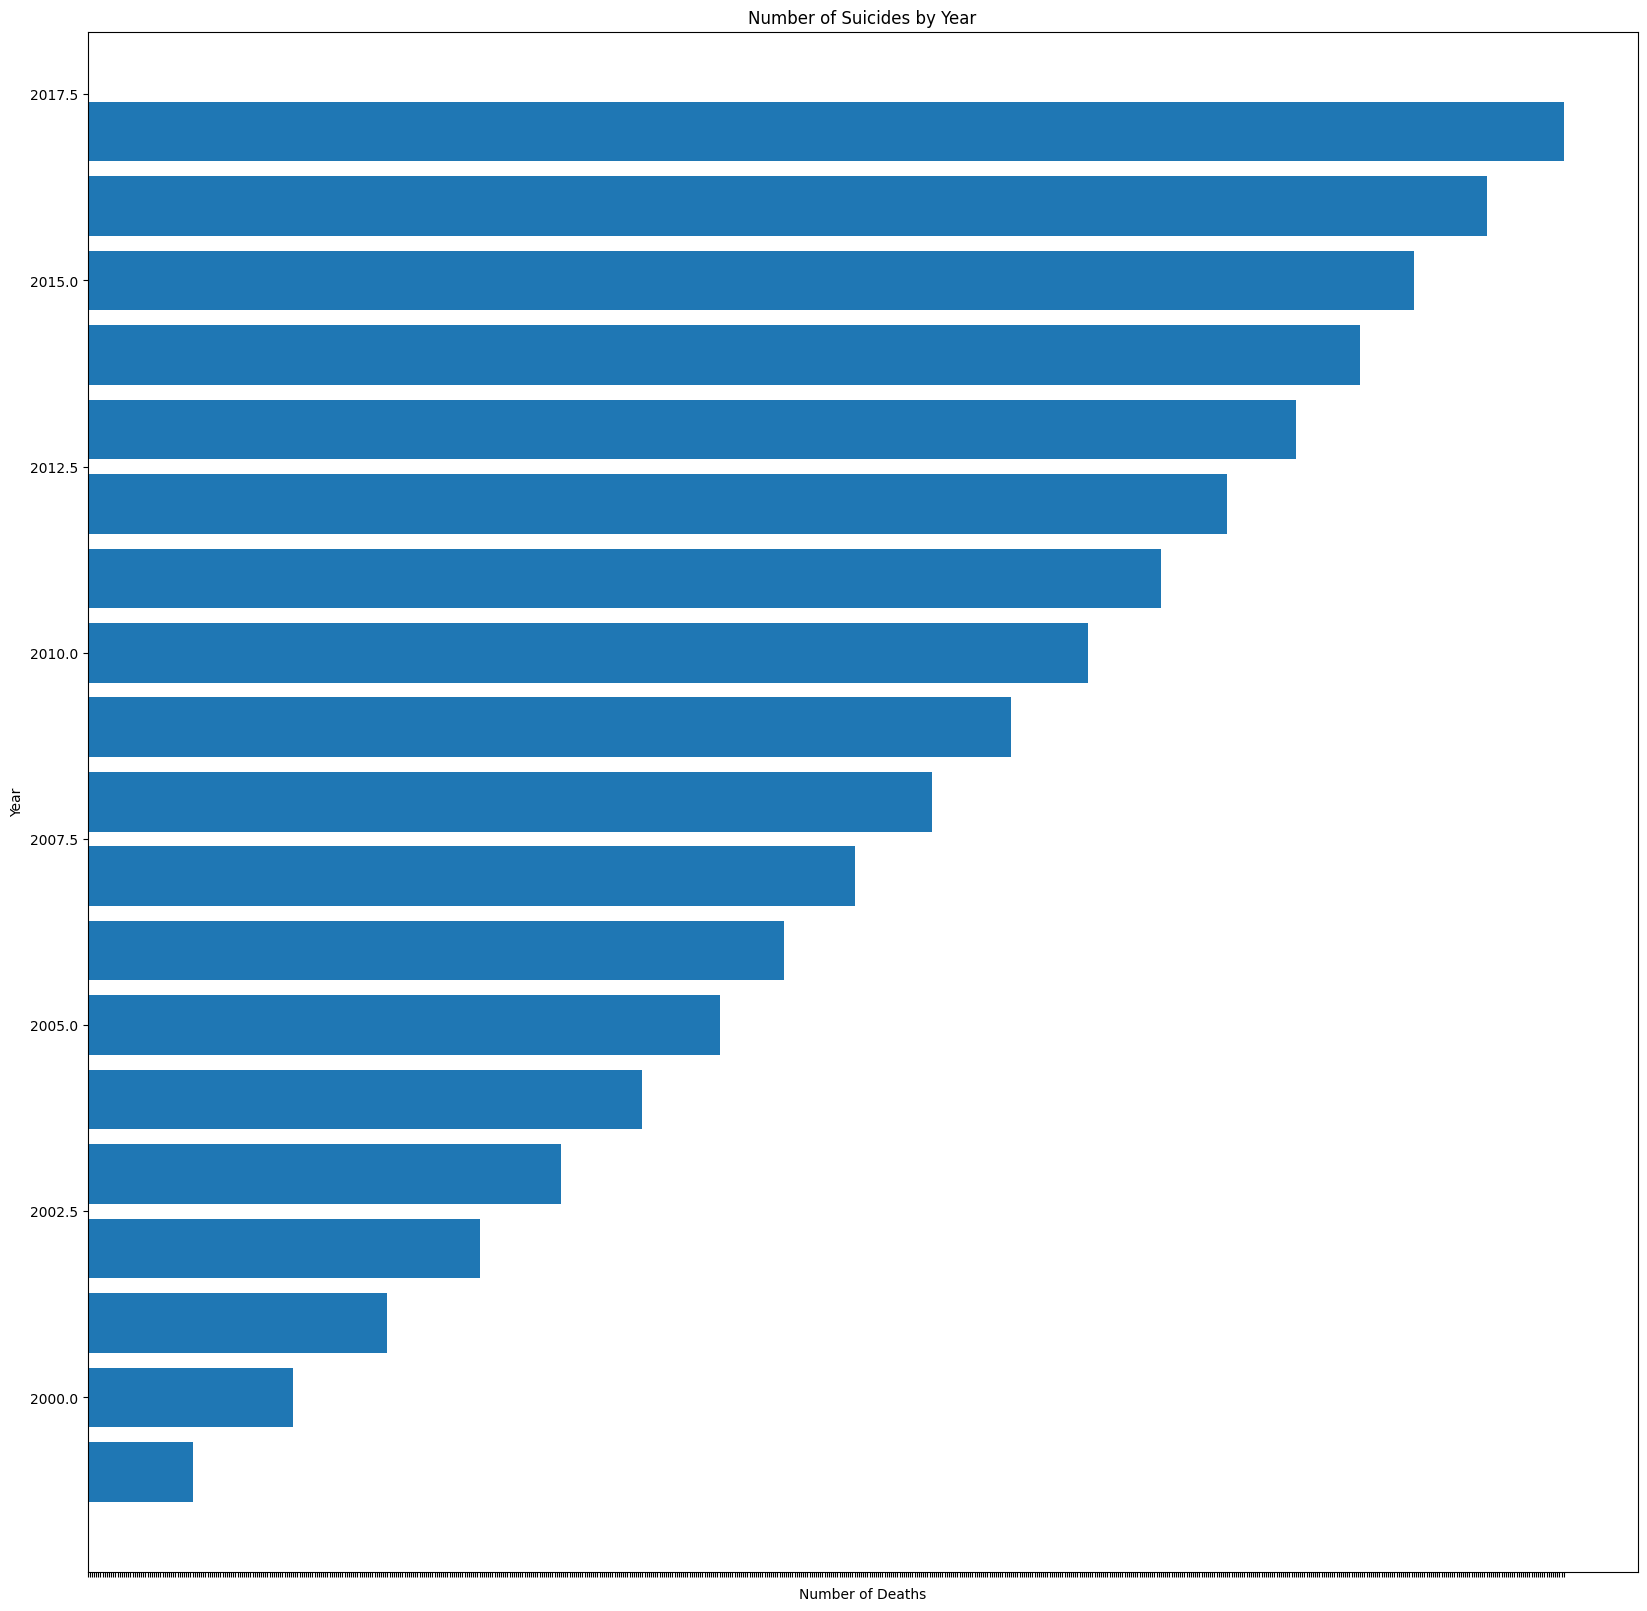

In [ ]:
# Assuming data is a pandas DataFrame
sorted_data = data.sort_values('Year')

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(sorted_data['Year'], sorted_data['Deaths'])
plt.xlabel("Number of Deaths")
plt.ylabel("Year")
plt.title("Number of Suicides by Year")

# Set the xticklabels to an empty list
ax.set_xticklabels([])

plt.show()